In [2]:
import numpy as np
import torch
from torch import nn
from PIL import Image
from torchvision.transforms import transforms

In [3]:


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.sequential = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(start_dim=1),
            nn.Linear(in_features=64 * 4 * 4, out_features=10)
        )

    def forward(self, x):
        out = self.sequential(x)
        return out

In [4]:
###模型加载
net=Net()
net.load_state_dict(torch.load("hmy_net_model8.pth",map_location=torch.device('cpu')))

<All keys matched successfully>

C:\Users\Zzz\AppData\Local\Temp\ipykernel_24888\2586419756.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  img_array=np.array(img_tensor)*255


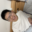

In [16]:
###图片加载
###先加载为PIL格式
img=Image.open('hmy.jpg')
img=img.convert('RGB')
###图片转换
transform = transforms.Compose([    transforms.Resize(32) # 短边缩放到32
    ,transforms.CenterCrop((32, 32))  # 裁剪到32x32
    ,transforms.ToTensor()])
img_tensor=transform(img)

####还原需要先乘以255
img_array=np.array(img_tensor)*255
###还原需要设置为uint8格式
img_array=img_array.astype('uint8')
###还原需要修改通道维度的位置
img_array=img_array.transpose((1,2,0))
###np.array图像表示
Image.fromarray(img_array)

In [17]:
input=img_tensor.reshape(1,3,32,32)

In [18]:
out=net.forward(input)

In [19]:
out.argmax(dim=1).item()

3